In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [118]:
sample = np.loadtxt("/Users/vivekkumarsah/Downloads/A5_q6.txt", delimiter='\t')
sample_input = []
for x in range(0,len(sample)):
    sample_input.append( int (sample[x][1]))

X_train = sample[:,0]
Y_train = sample[:,1]
X_split = [ X_train [i:i + int(len(X_train)/4)] for i in range(0, len(X_train), int(len(X_train)/4)) ]
Y_split = [ Y_train [i:i + int(len(Y_train)/4)] for i in range(0, len(Y_train), int(len(Y_train)/4)) ]

In [135]:
def error_calc(y_predicted, y_actual):
    error = []
    error1 = []
    for x in range(0,len(y_predicted)):
        val = abs(y_predicted[x] - y_actual[x])
        val1 = (abs(y_predicted[x] - y_actual[x])*100)/y_actual[x]
        error.append(val)
        error1.append(val1)
    
    return np.mean(error),np.mean(error1)

In [175]:
def plot(X, Y_actual, Y_predicted, title):
    plt.plot(X, Y_actual, label = 'Y_original')
    plt.plot(X, Y_predicted, label = 'Y_predicted')
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend(loc = 'best')
    plt.title(title)
    plt.rcParams["figure.figsize"] = [15,7]
    plt.rcParams.update({'font.size': 15})
    plt.show()

In [57]:
def simple_lr(X, Y):
    X_bar = np.mean(X)
    Y_bar = np.mean(Y)

    X_diff = X - X_bar
    Y_diff = Y - Y_bar

    beta_1 = np.dot(X_diff, Y_diff) / np.dot(X_diff, X_diff)
    beta_0 = Y_bar - (beta_1 * X_bar)

    Y_pred = beta_0 + beta_1 * X

    sse = np.sum(np.square(Y_pred - Y))
    mape = (100*np.sum(np.divide(np.abs(Y - Y_pred), Y)))/len(Y)
    
    return Y_pred, beta_0, beta_1, sse, mape

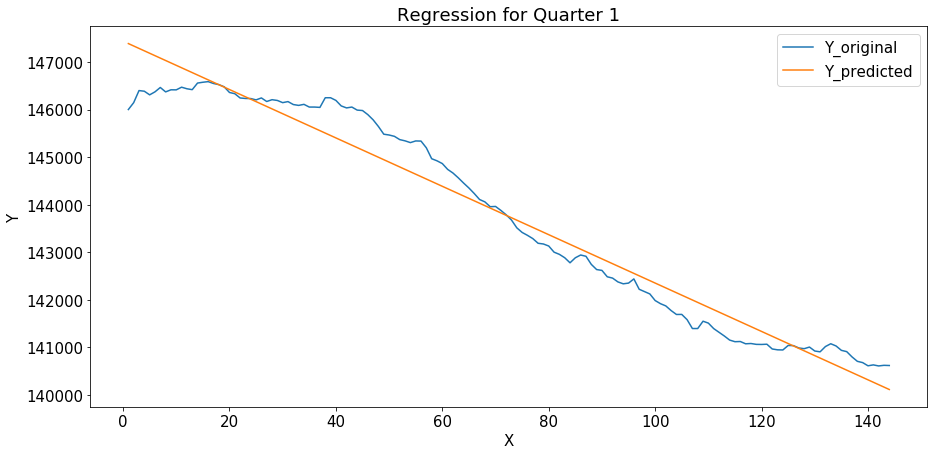

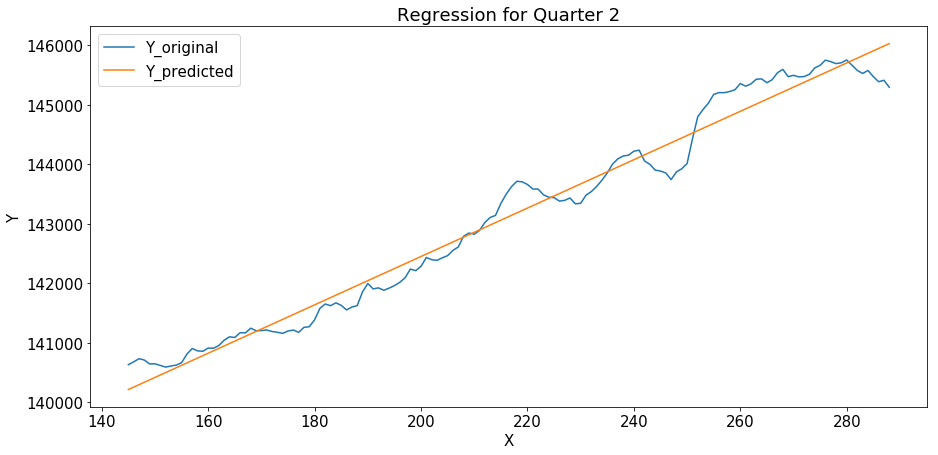

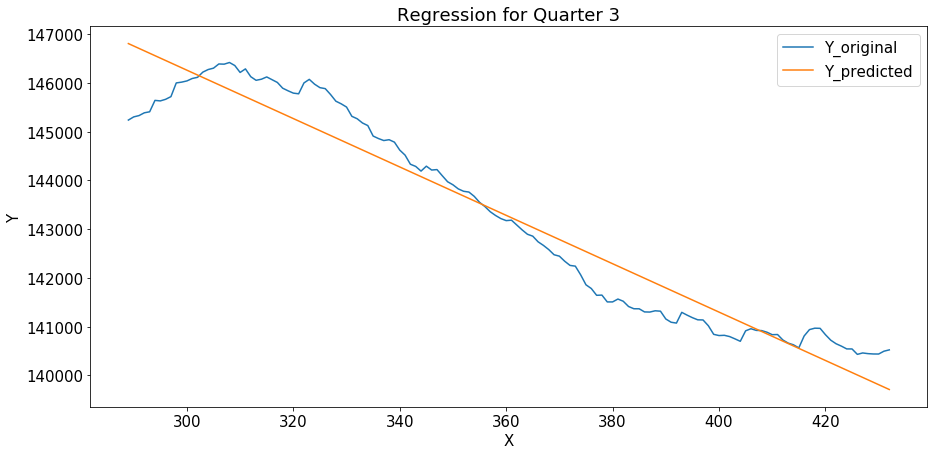

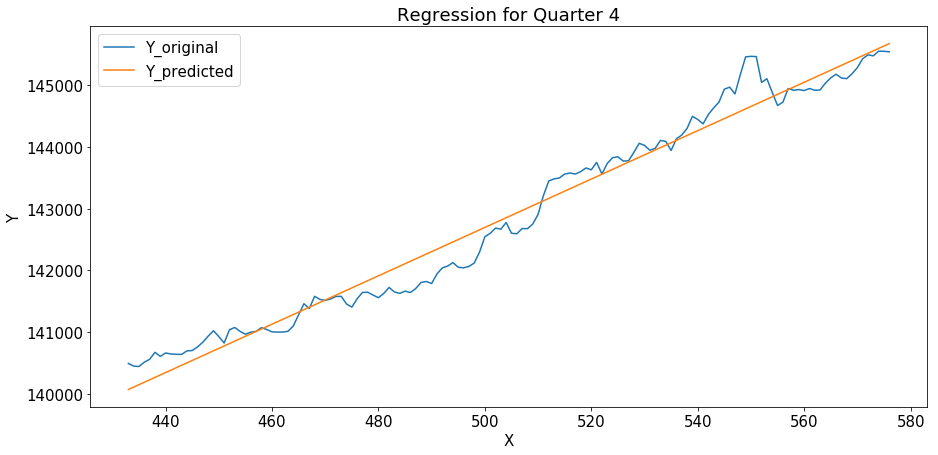

SSE for Quarter 1 28176831.901159
SSE for Quarter 2 10656145.204724
SSE for Quarter 3 43197449.811269
SSE for Quarter 4 10948958.734072


In [177]:
# Question 6(a)
   
sse_list = []
for i in range(4):       
    Y_pred, _, _, sse, _ = simple_lr(X_split[i], Y_split[i])
    sse_list.append(sse)
    plot(X_split[i], Y_split[i], Y_pred, 'Regression for Quarter ' + str(i+1))

for i, sse in enumerate(sse_list):
    print("SSE for Quarter %d %f" %(i+1, sse))


In [165]:
### Ques 6 b

def EWMA(sample_input, alpha, idx):
    
    base_case = 0.0
    for x in range(0, idx):
        base_case += sample_input[idx-x-1]*((1 - alpha)**x)
    
    base_case = alpha * base_case
    
    y_predicted = []
    y_predicted.append(base_case)
    for t in range(idx+1, len(sample_input)):
        y_predicted.append(alpha * sample_input[t-1] + (1 - alpha) * y_predicted[-1])
    
    y_actual = sample_input[idx:]
    error,error_per = error_calc(y_predicted, y_actual)
    
    return y_predicted, error,error_per

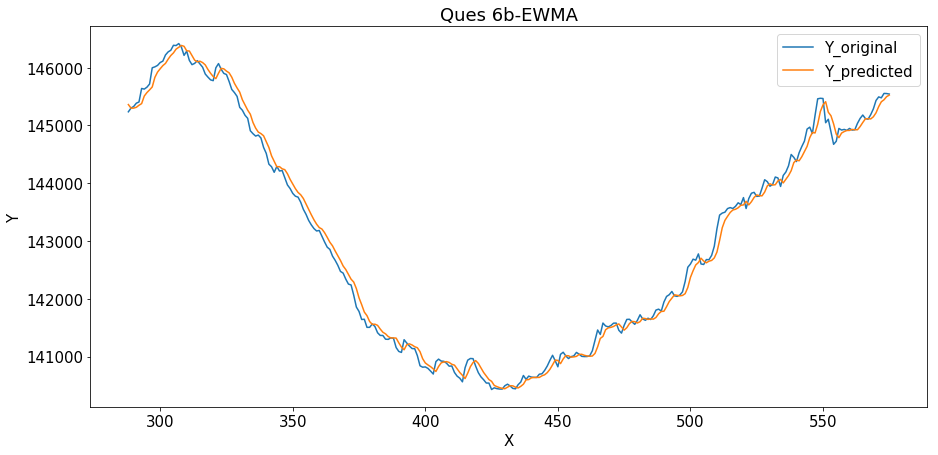

Average Error is 112.57530569648468
Average Error percent is 0.07852972594855746


In [181]:
y_predicted,error,error_per = EWMA(sample_input,0.5,288)
X = []
for x in range(288,576):
    X.append(x)
plot(X,sample_input[288:], y_predicted, 'Ques 6b-EWMA')
print("Average Error is " + str(error))
print("Average Error percent is " + str(error_per))

In [140]:
def seasonal(sample_input):
    y_predicted = sample_input[:288]
    y_actual = sample_input[288:]
    error,error_per = error_calc(y_predicted, y_actual)
    return y_predicted, error, error_per

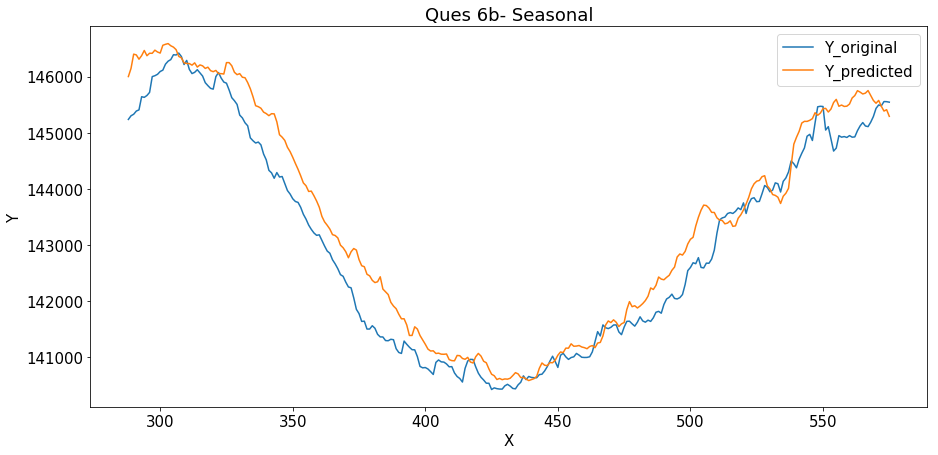

Average Error is 403.86805555555554
Average Error percent is 0.2819586242684633


In [182]:
y_predicted,error,error_per = seasonal(sample_input)
X = []
for x in range(288,576):
    X.append(x)
plot(X,sample_input[288:], y_predicted, 'Ques 6b- Seasonal')
print("Average Error is " + str(error))
print("Average Error percent is " + str(error_per))

In [112]:
def partitionData(sample_input, p):
    sample_input_train = []
    for x in range(0, len(sample_input)-p):
        tmp = []
        for i in range(0, p+1):
            tmp.append(sample_input[x+i])
        sample_input_train.append(tmp)
    sample_input_train = np.array(sample_input_train)
        
    X_train = sample_input_train[:,:-1]
    X_train = np.hstack((np.ones((len(X_train), 1)), X_train))
    Y_train = sample_input_train[:,-1]
    return X_train, Y_train

def multiple_lr(X, Y):
    beta = np.dot(np.linalg.inv(np.dot(np.transpose(X), X)), np.dot(np.transpose(X), Y))
    return beta

def predict(X, beta):
    return np.dot(X, beta)

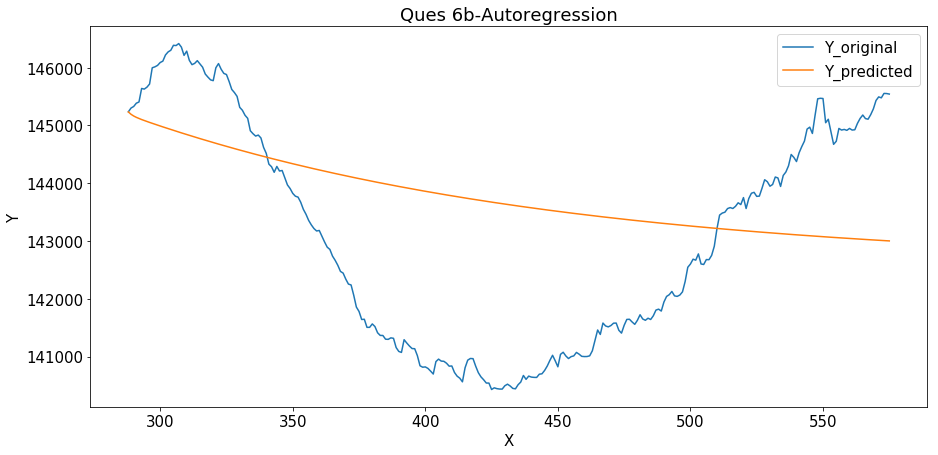

Average Error is 1696.9368242402622
Average Error percent is 1.1919321066834467


In [194]:
Y_predict = []
sample_ip = sample_input[:288]
for x in range(0,len(sample_input)-288):
    X_train, Y_train = partitionData(sample_ip,3)
    beta = multiple_lr(X_train, Y_train)
    
    X_test = sample_ip[285+x:288+x]
    X_test.insert(0,1)
    
    val = predict(X_test,beta)
    
    Y_predict.append(val)
    sample_ip.append(val)

y_actual = sample_input[288:576]
error,error_per = error_calc(Y_predict, y_actual)
X = []
for x in range(288,576):
    X.append(x)
plot(X,sample_input[288:], Y_predict, 'Ques 6b-Autoregression')
print("Average Error is " + str(error))
print("Average Error percent is " + str(error_per))